In [1]:
import numpy as np

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
print(d)

            0         1
0    6.488267  0.250064
1    2.521947 -2.697986
2    3.068773 -2.900076
3    4.314275  0.702951
4    2.384499 -2.535635
5    7.805410 -1.702978
6    0.838773  2.223222
7    4.176143  0.007931
8    3.026685 -1.790418
9    1.269879  1.767474
10   7.819745 -0.949424
11   0.187335  2.519219
12   3.431168  2.338123
13   3.398061 -2.394825
14   2.956796 -0.791982
15   1.131720  3.228815
16   1.597017 -1.808223
17   0.409868  1.623505
18   3.892901  1.217675
19   3.546666 -1.227690
20   3.535546 -1.064060
21   2.663292 -2.072162
22   7.151342 -1.954833
23   4.684806  1.076274
24   4.785261  0.815468
25   7.109134 -2.115220
26   7.237732 -0.627610
27   3.268018  0.488382
28   4.493953  1.689088
29   0.872309  3.410853
..        ...       ...
370  2.757325 -0.961423
371  3.342553  1.351409
372  3.647950  1.213874
373  2.974254 -1.604968
374  7.053514 -2.293669
375  4.797890  1.439344
376  7.894198 -0.976762
377  7.556857 -1.730141
378  2.594209 -2.736748
379  7.600730 -1

(400, 2)


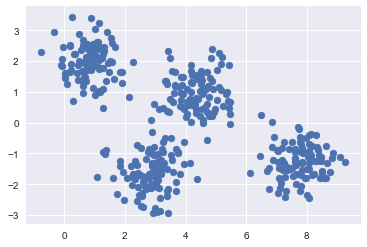

In [48]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

print(X.shape)
d = pd.DataFrame(X)
plt.scatter(d[0],d[1])

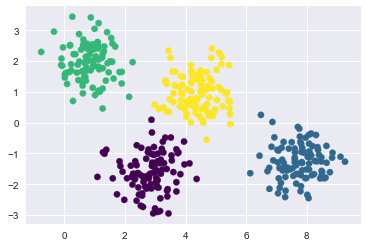

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

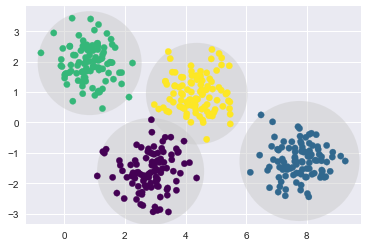

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

C:\Users\jayaramkapil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jayaramkapil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jayaramkapil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=Deprecation

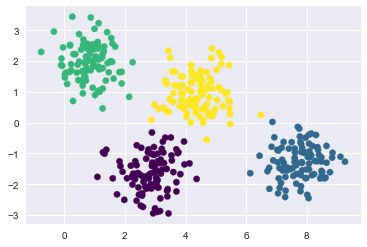

In [21]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [24]:
X.shape

(400, 2)

In [28]:
import pandas as pd
pd.DataFrame(X)

,0,1
0,6.488267,0.250064
1,2.521947,-2.697986
2,3.068773,-2.900076
3,4.314275,0.702951
4,2.384499,-2.535635
5,7.805410,-1.702978
6,0.838773,2.223222
7,4.176143,0.007931
8,3.026685,-1.790418
9,1.269879,1.767474


In [35]:
probs = gmm.predict_proba(X)
print(pd.DataFrame(probs.round(3)))

         0      1      2      3
0    0.000  0.475  0.000  0.525
1    1.000  0.000  0.000  0.000
2    1.000  0.000  0.000  0.000
3    0.000  0.000  0.000  1.000
4    1.000  0.000  0.000  0.000
5    0.000  1.000  0.000  0.000
6    0.000  0.000  1.000  0.000
7    0.008  0.000  0.000  0.992
8    1.000  0.000  0.000  0.000
9    0.000  0.000  1.000  0.000
10   0.000  1.000  0.000  0.000
11   0.000  0.000  1.000  0.000
12   0.000  0.000  0.000  1.000
13   1.000  0.000  0.000  0.000
14   0.995  0.000  0.000  0.005
15   0.000  0.000  1.000  0.000
16   1.000  0.000  0.000  0.000
17   0.000  0.000  1.000  0.000
18   0.000  0.000  0.000  1.000
19   0.998  0.000  0.000  0.002
20   0.993  0.000  0.000  0.007
21   1.000  0.000  0.000  0.000
22   0.000  1.000  0.000  0.000
23   0.000  0.000  0.000  1.000
24   0.000  0.000  0.000  1.000
25   0.000  1.000  0.000  0.000
26   0.000  1.000  0.000  0.000
27   0.009  0.000  0.000  0.991
28   0.000  0.000  0.000  1.000
29   0.000  0.000  1.000  0.000
..     .

C:\Users\jayaramkapil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
